In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [65]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [66]:
df.shape

(1000, 2)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [68]:
# Checking null values

In [69]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [70]:
# Checking for duplicates
df.duplicated().sum()

4

In [71]:
df = df.drop_duplicates(keep='first')

In [72]:
df.duplicated().sum()

0

In [73]:
df.shape

(996, 2)

In [74]:
# Checking distribution of both classes
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

In [75]:
plt.style.use('fivethirtyeight')

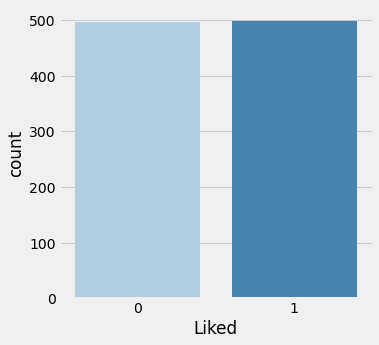

In [76]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Liked'], palette='Blues', linewidth=1)
plt.show()

In [77]:
import nltk

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Satyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
df['num_characters'] = df['Review'].apply(len)

In [80]:
df.head()

,Review,Liked,num_characters
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [81]:
df['num_words'] = df['Review'].apply(lambda x: len(nltk.word_tokenize(x)))

In [82]:
df.head()

,Review,Liked,num_characters,num_words
0,Wow... Loved this place.,1,24,6
1,Crust is not good.,0,18,5
2,Not tasty and the texture was just nasty.,0,41,9
3,Stopped by during the late May bank holiday of...,1,87,16
4,The selection on the menu was great and so wer...,1,59,13


In [83]:
df['num_sentences'] = df['Review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [84]:
df.head()

,Review,Liked,num_characters,num_words,num_sentences
0,Wow... Loved this place.,1,24,6,2
1,Crust is not good.,0,18,5,1
2,Not tasty and the texture was just nasty.,0,41,9,1
3,Stopped by during the late May bank holiday of...,1,87,16,1
4,The selection on the menu was great and so wer...,1,59,13,1


In [85]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,996.000000,996.000000,996.000000
mean,58.459839,12.711847,1.039157
std,32.341292,6.734767,0.194065
min,11.000000,3.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,51.000000,11.000000,1.000000
75%,80.000000,17.000000,1.000000
max,149.000000,34.000000,2.000000


In [86]:
# Negative Review description
df[df['Liked'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,497.000000,497.000000,497.000000
mean,60.973843,13.370221,1.030181
std,34.201804,7.107169,0.171258
min,11.000000,3.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,53.000000,12.000000,1.000000
75%,84.000000,18.000000,1.000000
max,149.000000,34.000000,2.000000


In [87]:
# Positive Review description
df[df['Liked'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,499.000000,499.000000,499.000000
mean,55.955912,12.056112,1.048096
std,30.202032,6.280976,0.214184
min,11.000000,3.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,50.000000,11.000000,1.000000
75%,73.500000,16.000000,1.000000
max,148.000000,33.000000,2.000000


<AxesSubplot:>

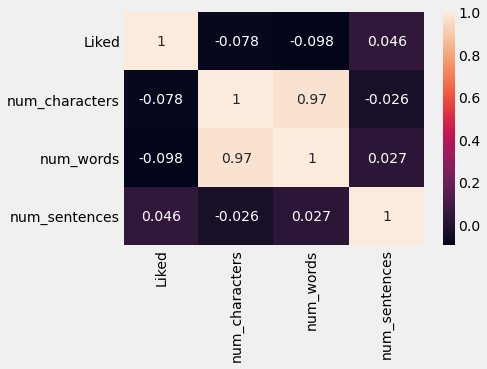

In [88]:
sns.heatmap(df.corr(), annot=True)

In [89]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Satyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Satyam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [90]:
stopWords = stopwords.words('english')

In [91]:
# remove no and not from list of stopwords
stopWords.remove('no')
stopWords.remove('not')

In [92]:
# Creating function to perform preprocessing like converting to lowercase, word tokenization, removing special characters, stop words, punctuation and lemmatization.

def transform_text(text):
    text_lower = text.lower()
    text_lower_token = nltk.word_tokenize(text_lower)
    text_final = []
    
    for i in text_lower_token:
        if i.isalnum():
            text_final.append(i)
            
    text_all = text_final[:]
    text_final.clear()
    
    for i in text_all:
        if i not in stopWords and i not in string.punctuation:
            text_final.append(i)
                 
    
    text_new = text_final[:]
    text_final.clear()
    
              
    lemmatizer = WordNetLemmatizer()   
    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text_new]
    
    return " ".join(lemmatized_words)

In [93]:
df['Review'].apply(transform_text)

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: Review, Length: 996, dtype: object

In [94]:
df['transformed_review'] = df['Review'].apply(transform_text)

In [95]:
df.head()

,Review,Liked,num_characters,num_words,num_sentences,transformed_review
0,Wow... Loved this place.,1,24,6,2,wow loved place
1,Crust is not good.,0,18,5,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,9,1,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,16,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,59,13,1,selection menu great price


In [96]:
df_new = df.copy()

In [97]:
df_new

,Review,Liked,num_characters,num_words,num_sentences,transformed_review
0,Wow... Loved this place.,1,24,6,2,wow loved place
1,Crust is not good.,0,18,5,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,9,1,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,16,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,59,13,1,selection menu great price
...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,13,1,think food flavor texture lacking
996,Appetite instantly gone.,0,24,4,1,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,50,11,1,overall not impressed would not go back
998,"The whole experience was underwhelming, and I ...",0,91,19,1,whole experience underwhelming think go ninja ...


In [98]:
df_new.drop(columns='Review', inplace=True)

In [99]:
df_new

,Liked,num_characters,num_words,num_sentences,transformed_review
0,1,24,6,2,wow loved place
1,0,18,5,1,crust not good
2,0,41,9,1,not tasty texture nasty
3,1,87,16,1,stopped late may bank holiday rick steve recom...
4,1,59,13,1,selection menu great price
...,...,...,...,...,...
995,0,66,13,1,think food flavor texture lacking
996,0,24,4,1,appetite instantly gone
997,0,50,11,1,overall not impressed would not go back
998,0,91,19,1,whole experience underwhelming think go ninja ...


In [100]:
from wordcloud import WordCloud
wc = WordCloud(width=1920, height=1080, margin=0, min_font_size=10, background_color='white')

In [101]:
wc_negative = wc.generate(df_new[df_new['Liked'] == 0]['transformed_review'].str.cat(sep=' '))

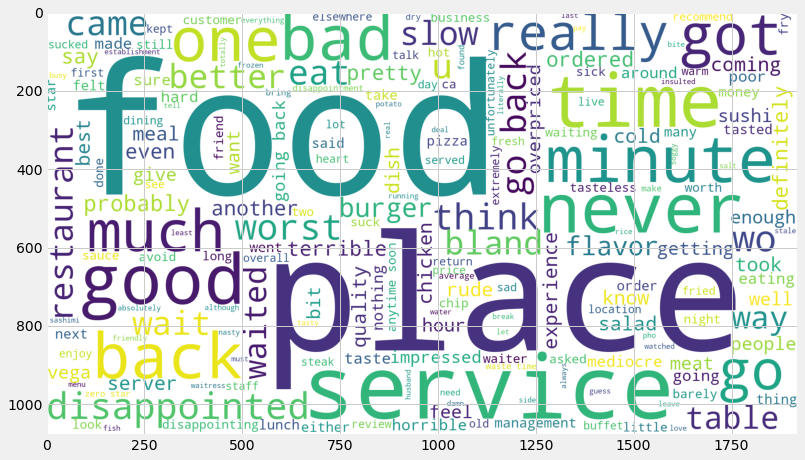

In [102]:
# wordcloud for negative  review
plt.figure(figsize=(12,12))
plt.imshow(wc_negative)

In [103]:
wc_positive = wc.generate(df_new[df_new['Liked'] == 1]['transformed_review'].str.cat(sep=' '))

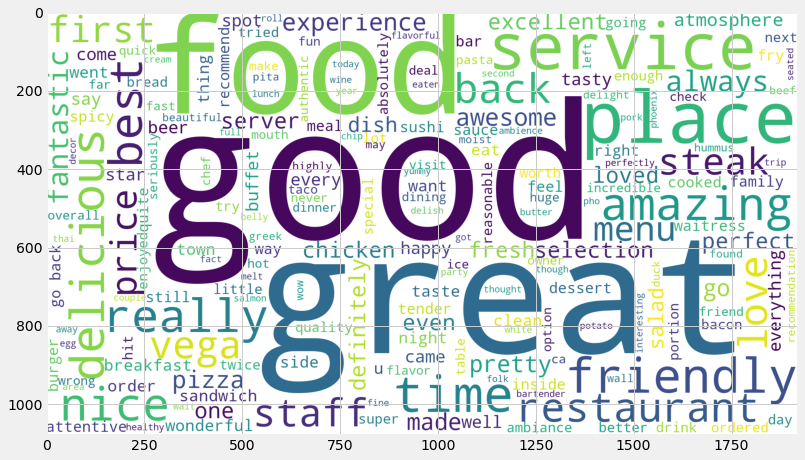

In [104]:
# wordcloud for positive review
plt.figure(figsize=(12, 12))
plt.imshow(wc_positive)

In [105]:
from collections import Counter

In [106]:
# extracting most common words from negative review
neg_corpus = []
for sent in df_new[df_new['Liked'] == 0]['transformed_review'].tolist():
    for word in sent.split():
        neg_corpus.append(word)

In [107]:
len(neg_corpus)

2952

C:\Users\Satyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


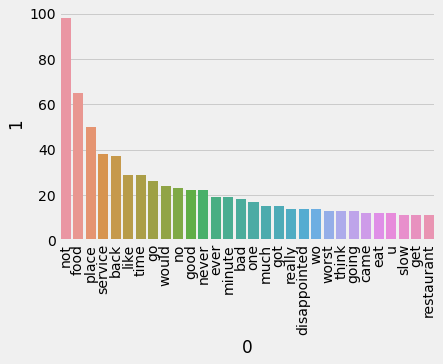

In [108]:
sns.barplot(pd.DataFrame(Counter(neg_corpus).most_common(30))[0], pd.DataFrame(Counter(neg_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# extracting most common words from positive review
pos_corpus = []
for sent in df_new[df_new['Liked'] == 1]['transformed_review'].tolist():
    for word in sent.split():
        pos_corpus.append(word)

In [110]:
len(pos_corpus)

2699

C:\Users\Satyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


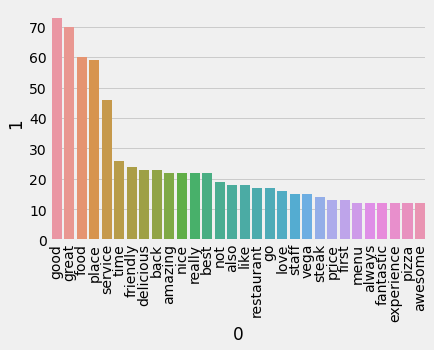

In [111]:
sns.barplot(pd.DataFrame(Counter(pos_corpus).most_common(30))[0],pd.DataFrame(Counter(pos_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [112]:
# Implementing tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500)

In [113]:
X = tfidf.fit_transform(df_new['transformed_review']).toarray()

In [114]:
X.shape

(996, 1500)

In [115]:
y = df_new['Liked'].values

In [116]:
y.shape

(996,)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
# Implementing Multnomial NB, Random Forest and Logistic regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [127]:
mnb = MultinomialNB(alpha=0.2)
rf_classifier = RandomForestClassifier(n_estimators=150,min_samples_split=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    2.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.3s finished


In [131]:
mnb.fit(x_train, y_train)
y_pred1 = mnb.predict(x_test) 
print("Accuracy:",accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

Accuracy: 0.782608695652174
[[125  30]
 [ 35 109]]
0.7841726618705036


In [135]:
rf_classifier.fit(x_train, y_train)
y_pred2 = rf_classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Accuracy: 0.802675585284281
[[145  10]
 [ 49  95]]
0.9047619047619048


In [136]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train)
y_pred3 = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Accuracy: 0.8260869565217391
[[138  17]
 [ 35 109]]
0.8650793650793651


[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    1.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.7s finished


In [137]:
import pickle

In [138]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

In [140]:
pickle.dump(clf, open('clf_model.pkl', 'wb'))